<a href="https://colab.research.google.com/github/haligene109/Eugen/blob/main/Activity_Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this task, you will do the follow
* Get the dataset (pizza_steak)
* Use CNN with TensorFlow
* Steps in modelling an end-to-end binary classification with CNNs
   * Prepare the data
   * Create a CNN
   * Compile a model
   * Fit a model
   * Evaluate a model
   * Improve a model
   * Make predictions with the trainned model
   * Save the model
* An end-to-end multi-class image classification

In [23]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-11-28 12:50:48.289928


**Import the data**
* Google Food101 dataset: https://www.kaggle.com/datasets/dansbecker/food-101
   * This collection has 101 different categories of 101,000 real-world images of food dishes with 1000 images for each category.
   * Firts, let's use pizza and steak categories to build a binary classifier
   * We are using preprocessed dataset.
     * For details about preprocessing steps see: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [24]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip # Most of the time, you will not get a preprocessed dataset to download and use directly. Refer to details about data preprocessing in the link given above
                                                                                  #Unzip the downloaded file

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-28 12:50:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   204MB/s    in 0.5s    

2023-11-28 12:50:49 (204 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



**Understanding your dataset**.
* This requires visualising the data you downloaded:
  * The train directory, which contains images in the training dataset
  * The test directory, which contains images in the test dataset

In [25]:
!ls pizza_steak

test  train


In [26]:
!ls pizza_steak/train/

pizza  steak


You can get class names with lists of classess

In [27]:
!ls pizza_steak/train/steak/  # Inside steak directory

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [28]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


**We can start with 50% of the dataset**

In [29]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak")) # How many train pizza and steaks images?

num_steak_images_train

750

In [30]:
number_of_steak_test_images = len(os.listdir("pizza_steak/test/steak")) # How many train pizza and steaks images?

In [31]:
number_of_steak_test_images

250

Keep visualising your dataset

In [32]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [33]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (307, 512, 3)


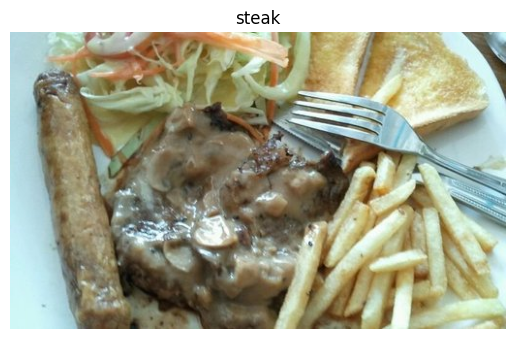

In [34]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [35]:
# View the img, computers see this image in the form of tensors
img

array([[[173, 209, 221],
        [173, 209, 221],
        [174, 210, 222],
        ...,
        [202, 241, 236],
        [192, 231, 226],
        [181, 221, 213]],

       [[175, 211, 223],
        [175, 211, 223],
        [176, 212, 224],
        ...,
        [208, 247, 244],
        [205, 244, 239],
        [199, 239, 231]],

       [[178, 214, 226],
        [177, 213, 225],
        [177, 214, 223],
        ...,
        [211, 251, 250],
        [213, 254, 250],
        [213, 254, 248]],

       ...,

       [[207, 247, 246],
        [207, 247, 246],
        [207, 247, 246],
        ...,
        [151, 153, 113],
        [152, 158, 120],
        [152, 160, 123]],

       [[207, 247, 246],
        [207, 247, 246],
        [207, 247, 246],
        ...,
        [158, 163, 123],
        [154, 164, 127],
        [150, 162, 126]],

       [[207, 247, 246],
        [207, 247, 246],
        [207, 247, 246],
        ...,
        [168, 173, 133],
        [159, 169, 132],
        [151, 163, 127]]

In [36]:
# View the image shape and the colour channels
img.shape # returns (width, height, colour channels)

(307, 512, 3)

In [37]:
# Get all the pixel values between 0 & 1. This is to normalise the pixels values to some numbers between 0 and 1
img/255.

array([[[0.67843137, 0.81960784, 0.86666667],
        [0.67843137, 0.81960784, 0.86666667],
        [0.68235294, 0.82352941, 0.87058824],
        ...,
        [0.79215686, 0.94509804, 0.9254902 ],
        [0.75294118, 0.90588235, 0.88627451],
        [0.70980392, 0.86666667, 0.83529412]],

       [[0.68627451, 0.82745098, 0.8745098 ],
        [0.68627451, 0.82745098, 0.8745098 ],
        [0.69019608, 0.83137255, 0.87843137],
        ...,
        [0.81568627, 0.96862745, 0.95686275],
        [0.80392157, 0.95686275, 0.9372549 ],
        [0.78039216, 0.9372549 , 0.90588235]],

       [[0.69803922, 0.83921569, 0.88627451],
        [0.69411765, 0.83529412, 0.88235294],
        [0.69411765, 0.83921569, 0.8745098 ],
        ...,
        [0.82745098, 0.98431373, 0.98039216],
        [0.83529412, 0.99607843, 0.98039216],
        [0.83529412, 0.99607843, 0.97254902]],

       ...,

       [[0.81176471, 0.96862745, 0.96470588],
        [0.81176471, 0.96862745, 0.96470588],
        [0.81176471, 0

Use the link below to see components of a CNN and example to show how you may use input and layers:
https://drive.google.com/file/d/1lqEMfQtzUzN-v9ylQ8ENaK90eCzdTmL1/view?usp=sharing

Having visualised the dataset, we can now perform an end-to-end ML modelling task.

Examples of end-to-end CNN classification modelling tasks

** CNN classification modelling**
* Create the model
* Compile the model
* Fit the model

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer)

* The convolution layers"2D" Conv2D means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* filters - these are the number of "feature extractors" that will be moving over our images.
* kernel_size - the size of our filters, for instance, a kernel_size of (3, 3) (or just 3) means each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
* padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide be divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.
* steps_per_epoch - this is the number of batches a model will go through per epoch, in this case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
* validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 17s 117ms/step - loss: 0.6690 - accuracy: 0.5747 - val_loss: 0.5247 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 0.4760 - accuracy: 0.7807 - val_loss: 0.3871 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4416 - accuracy: 0.8073 - val_loss: 0.3594 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 5s 105ms/step - loss: 0.3820 - accuracy: 0.8353 - val_loss: 0.3039 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.3638 - accuracy: 0.8487 - val_loss: 0.3104 - val_accuracy: 0.8740


After 5 epochs, our model_1 got ~86% accuaracy on the training set and ~86% accuracy on the test set (see below). However, this model only went through a binary classificaiton problem, not all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. The good news is that so far so good because the model is learning and making some sense of the image features.

model_1 is similar to https://poloclub.github.io/cnn-explainer/

In [39]:
# You can also use evaluate() to to valuate on the model of test dataset
model_1.evaluate(valid_data)


16/16 [==============================] - 1s 74ms/step - loss: 0.3104 - accuracy: 0.8740


[0.3103645145893097, 0.8740000128746033]

In [40]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-11-28 12:51:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.09s   

2023-11-28 12:51:35 (21.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



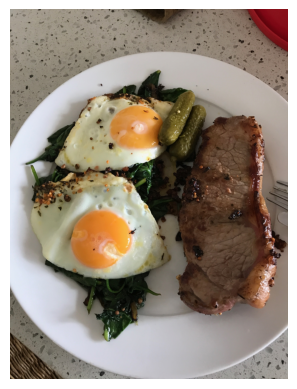

In [41]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

We have fitted model_1. It's architecture, see below, is similar to the CNN explainer: https://poloclub.github.io/cnn-explainer/

⚓ Do you notice that you have exactly same architecture as CNN explainer? Compaire names of layers in CNN explainer and in the summary of model_1.

In [42]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

We have used ImageDataGenerator class and flow_from_directory() method for data processing. Read about the ImageDataGenerator class on https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator and the flow_from_directory() method on https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory, and see what
* read about the batch_size parameter  
* read about the target_size parameter


You should also read about Conv2D layer on https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D as well as MaxPool2D on https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D

**Second** **Trial** **and** **Error** **Modelling**

ANN can be adapted to different problems. It's all about experimenting. Let's see how model_1 might work differently with the data we have

Experimenting means changing parameters and run to see if there could be different results. All parameters can be changed except the dataset (images) and and the input shape (the ANN need to know the shape of images.)

It is a common practice to reshape images all to one size. In this activity we are resizing the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the RGB colour channels

model_1 achieves accuracy of 86% on training and test dataset, but this on binary classification with use of 50% of the dataset. We wish to undergo multiple experiments with the baseline being 50%, so the aim is to improve the models performance.

In model-2, we are trying to redo model_1 differently.

In [43]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow basic model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 102ms/step - loss: 0.9753 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 100ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Model_2 attains accuracy of 50% on the training and validation dataset, which is a problem with this binary classification, it is guessing.

check model_2 architecture and compare with https://poloclub.github.io/cnn-explainer/

In [45]:
# model_2 architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In model_2, we can notice moe than double number of trainable parameters. However, model_2 has far low performance compared to model_1.

Any ideas about how to improve model-2? There are many ways to improve the ANNs models
* One quick way is to increase the number of hidden layers
* Another quick way is to increase the number of neurons in layers
* Many other ways exist
Now let's add 1 hidden layer and increase the number of hidden neurons (hidden layer neurons) from 4 to 100.

In [46]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra hidden layer and increase the number of hidden neurons from 4 to 100 in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 107ms/step - loss: 2.8075 - accuracy: 0.6367 - val_loss: 0.7427 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 5s 101ms/step - loss: 1.7307 - accuracy: 0.6387 - val_loss: 0.6504 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 5s 102ms/step - loss: 0.6849 - accuracy: 0.7267 - val_loss: 0.5836 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6410 - accuracy: 0.7307 - val_loss: 0.5095 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 5s 103ms/step - loss: 0.5174 - accuracy: 0.7687 - val_loss: 0.9178 - val_accuracy: 0.6260


The model is learning! the model attains around 72% on the training dataset and 70% on the test dataset. Compared to model_2, model_3 is learning and it seems adding 1 hidden layer and more  96 neurons has helped the model to improve its performance.

Let's see model_3 parameters

In [47]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Notice the number of trainable parameters! more than 15 million. Can you draw a conclusion on the power of CNN model, here say, model_1 given its performance for 31,000 trainable parameters and 62,000 parameters in model_2?

The CNN model, for instance model_1 have higher ability to learn patterns with less number of parameters.

**Mastery of Binary Classification**

Now that we know that modelling ANN is an experimental process with the aim of attaining higher model performance

In  the next step, we will seek mastery of binary classification with all the necessary steps with the aim of developing a CNN model, use it and save it. After this long excercise, we will perform multi-class classification

**Key Steps**
* Visualising the data
* Preprocess the data for modelling
* Create a CNN model
* Fit the model
* Evaluate the model
* Tune different parameters to improve model
* Repeat some steps until satisfied with the performance
* Use the model
*  Save the model

1. Data was imported, no need to repeat this first step

In [48]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (384, 512, 3)
Image shape: (318, 512, 3)


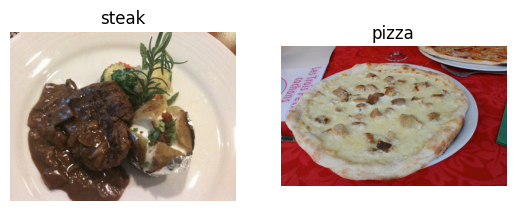

In [50]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

2 Preprocess the data
* In ML projects, creating a training and testing dataset is one of the most important steps. Our dataset is already split into training and test dataset. We may have to create a validation dataset.

The dataset need to have train and test directories with folders in each class for each class

In [51]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn the dataset into batches where a batch is a small subset of the dataset that a model learns from during the training process. An example is when you ave 10,000 images and instead of the ML model trying to learn from all of them to find petterns, a model might learn from only 32 images at a time. 32 is a batch size.

So we need to turn our dataset into batches. This requires to create an instance of ImageDataGenerator for our datasets.

In [52]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)